<a href="https://colab.research.google.com/github/kamalzada/Machine-Learning-Projects/blob/master/glycemic_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
URL = 'https://www.glycemicedge.com/glycemic-index-chart/'

In [81]:
req = requests.get(URL)
raw = pd.read_html(req.text)

In [82]:
df = raw.copy()
df = df[0]

In [101]:
df = df[['Glycemic Index (GI)', 'Glycemic Load (GL)']].dropna() 

In [105]:
def reduce_mem_usage(df, threshold=0.5):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage before: {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        
        elif col_type=='object':
            if df[col].nunique()/df[col].shape[0]<=threshold: 
                df[col] =  df[col].astype('category') 
            else:
                continue

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage now : {:.2f} MB'.format(end_mem))
    print('Memory usage decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [107]:
reduce_mem_usage(df)

Memory usage before: 0.00 MB
Memory usage now : 0.00 MB
Memory usage decreased by 50.0%


,Glycemic Index (GI),Glycemic Load (GL)
1,72.0,25.0
2,95.0,15.0
4,76.0,10.0
5,47.0,18.0
6,61.0,9.0
20,58.0,15.0
21,68.0,23.0
22,40.0,12.0
23,68.0,24.0
24,50.0,13.0


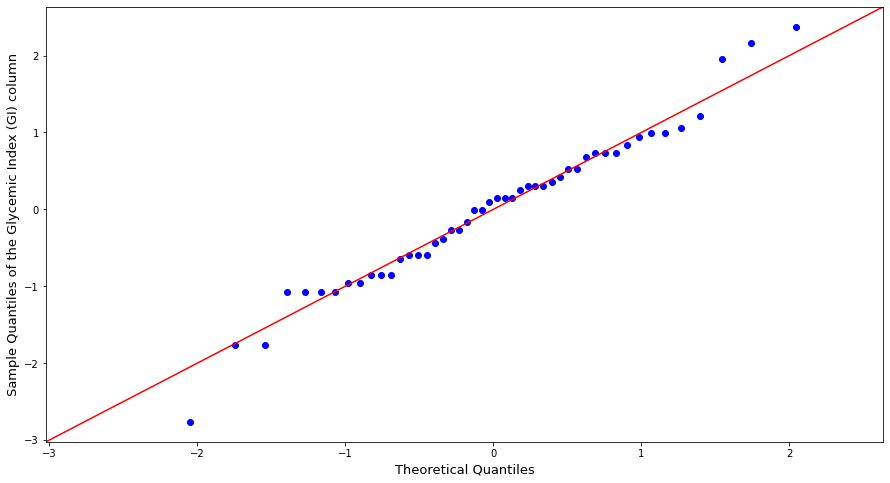

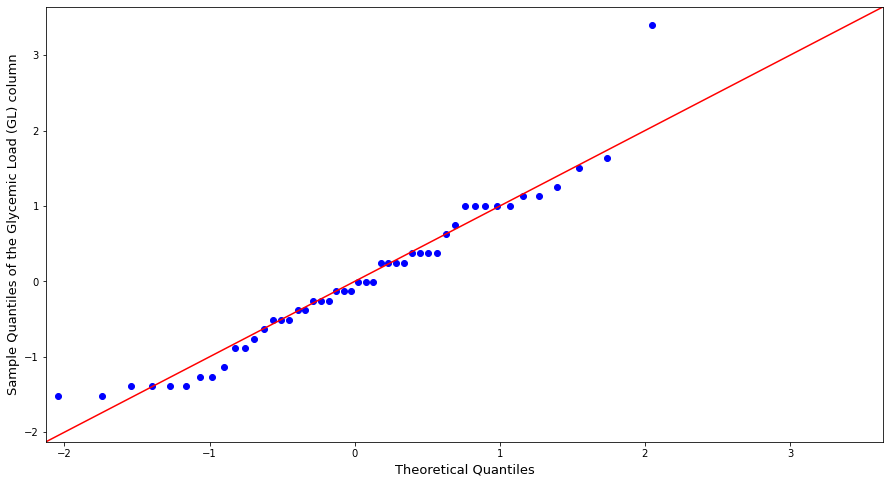

In [109]:
for column in df:
    fig = qqplot(df[column], line = '45', fit=True)
    ax = plt.gca()
    fig.set_size_inches(15, 8)
    ax.set_xlabel('Theoretical Quantiles', fontsize=13)
    ax.set_ylabel(f'Sample Quantiles of the {column} column', fontsize=13)
plt.show() 

In [112]:
#Correlation
df.corr(method='pearson')  

,Glycemic Index (GI),Glycemic Load (GL)
Glycemic Index (GI),1.00000,0.52222
Glycemic Load (GL),0.52222,1.00000


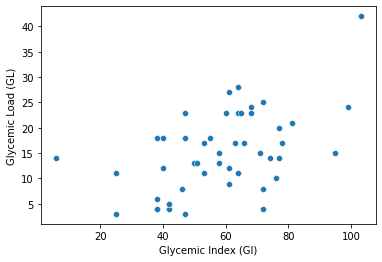

In [113]:
sns.scatterplot(x = 'Glycemic Index (GI)', y = 'Glycemic Load (GL)', data=df) 
plt.show() 